In [2]:
### Import necessary python packages

# math package
import numpy as np

# plotting packages
import matplotlib as mpl
from matplotlib import pyplot as plt

# input files reading package 
import json

# data container package
import pandas as pd


# get the time
from datetime import datetime
import time

import emcee


In [17]:

# Lire les valeurs depuis le fichier Emcee_values_Dm2.txt
emcee_values = np.loadtxt('Emcee_values_Dm2.txt')

# Lire les valeurs depuis le fichier MH_values_Dm2.txt
mh_values = np.loadtxt('HS_values_Dm2.txt')

# Lire les valeurs depuis le fichier Emcee_values_Dm2.txt
theta_Emcee_values = np.loadtxt('Emcee_values_theta.txt')

# Lire les valeurs depuis le fichier MH_values_Dm2.txt
theta_mh_values = np.loadtxt('HS_values_theta.txt')


In [23]:
bins_dm2=np.arange(0,0.01,1e-6)
bins_theta=np.arange(0,np.pi/2,1e-3)

In [14]:

# Création de l'histogramme pour obtenir les bins
counts, bin_edges = np.histogram(emcee_values, bins=bins_dm2)

# Utilisation des bords des bins pour regrouper les données
binned_data = []
for i in range(len(bin_edges)-1):
    bin_mask = (emcee_values >= bin_edges[i]) & (emcee_values < bin_edges[i + 1])
    binned_data.extend(emcee_values[bin_mask])

binned_data = np.array(binned_data)

counts_theta, bin_edges_theta = np.histogram(theta_Emcee_values, bins=bins_theta)

binned_data_theta = []

for i in range(len(bin_edges_theta) - 1):
    bin_mask_theta = (theta_Emcee_values >= bin_edges_theta[i]) & (theta_Emcee_values < bin_edges_theta[i + 1])
    binned_data_theta.extend(theta_Emcee_values[bin_mask_theta])

In [18]:
lower_quantile_5 = np.percentile(binned_data, 5)
upper_quantile_95 = np.percentile(binned_data, 95)
lower_quantile_15 = np.percentile(binned_data, 15.85)
upper_quantile_84 = np.percentile(binned_data, 84.15)
lower_quantile_5_t = np.percentile(binned_data_theta, 5)
upper_quantile_95_t = np.percentile(binned_data_theta, 95)
lower_quantile_15_t = np.percentile(binned_data_theta, 15.85)
upper_quantile_84_t = np.percentile(binned_data_theta, 84.15)

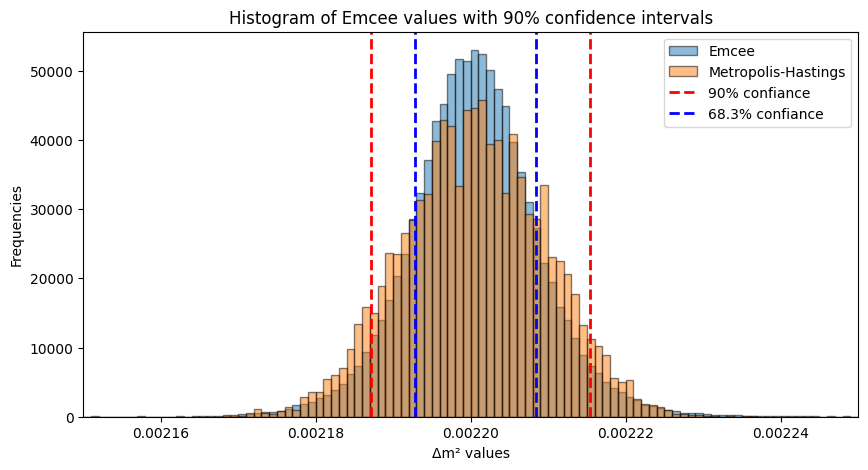

In [20]:
# Tracer les histogrammes
plt.figure(figsize=(10, 5))

# Histogramme pour Emcee_values_Dm2.txt
AA = plt.hist(emcee_values, bins=bins_dm2, alpha=0.5, label='Emcee', edgecolor='black', density=True)

# Histogramme pour MH_values_Dm2.txt
plt.hist(mh_values, bins=bins_dm2, alpha=0.5, label='Metropolis-Hastings', edgecolor='black', density=True)
plt.axvline(lower_quantile_5, color='r', linestyle='dashed', linewidth=2, label='90% confiance')
plt.axvline(upper_quantile_95, color='r', linestyle='dashed', linewidth=2)
plt.axvline(lower_quantile_15, color='b', linestyle='dashed', linewidth=2, label='68.3% confiance')
plt.axvline(upper_quantile_84, color='b', linestyle='dashed', linewidth=2)
plt.title('Histogram of Emcee values with 90% confidence intervals')
# Ajouter des titres et des étiquettes

plt.xlabel('Δm² values')
plt.ylabel('Frequencies')
plt.legend()

plt.xlim([0.00215, 0.00225])
# Afficher le graphique
#plt.savefig('Comparaison_Dm2.png')
plt.show()




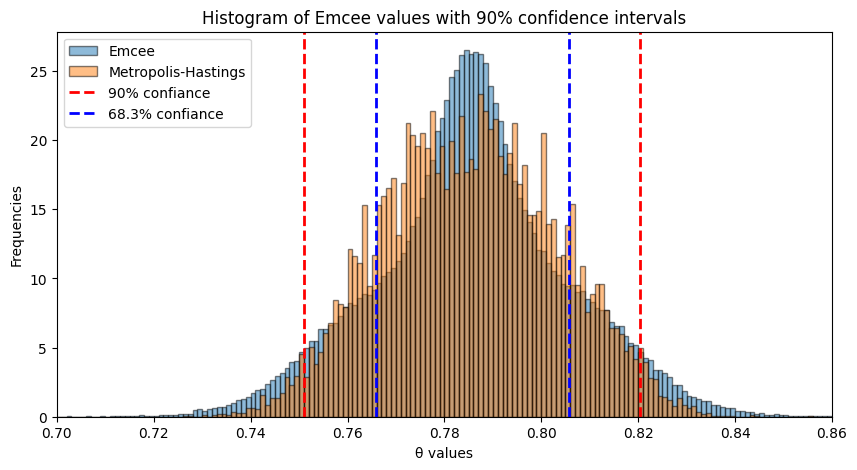

In [24]:
# Tracer les histogrammes
plt.figure(figsize=(10, 5))

# Histogramme pour Emcee_values_Dm2.txt
plt.hist(theta_Emcee_values, bins=bins_theta, alpha=0.5, label='Emcee', edgecolor='black', density=True)

# Histogramme pour MH_values_Dm2.txt
plt.hist(theta_mh_values, bins=bins_theta, alpha=0.5, label='Metropolis-Hastings', edgecolor='black', density=True)
plt.axvline(lower_quantile_5_t, color='r', linestyle='dashed', linewidth=2, label='90% confiance')
plt.axvline(upper_quantile_95_t, color='r', linestyle='dashed', linewidth=2)
plt.axvline(lower_quantile_15_t, color='b', linestyle='dashed', linewidth=2, label='68.3% confiance')
plt.axvline(upper_quantile_84_t, color='b', linestyle='dashed', linewidth=2)
plt.title('Histogram of Emcee values with 90% confidence intervals')

# Ajouter des titres et des étiquettes

plt.xlabel('θ values')
plt.ylabel('Frequencies')
plt.legend()

plt.xlim([0.7, 0.86])
# Afficher le graphique
plt.savefig('Comparaison_theta.png')
plt.show()